# Problema 3.18

La tabla da los valores de Kp (estado tipo: 1 atm) y de Kϕ (cociente de factores de fugacidad) a 450 °C para la reacción de formación de amoníaco gaseoso: 1/2 N2 + 3/2 H2 ⇌ NH3

Los valores de Kp fueron calculados partiendo de mezclas de N2 e H2 1:3 y determinando la cantidad de NH3 luego de alcanzado el equilibrio, mientras que los valores de Kϕ fueron calculados en base a un modelo de mezcla de gases.
a)Calcule la constante termodinámica, K = Kp×Kϕ, a cada presión y analice por qué                    aumenta con la presión. ¿Es natural que así sea o tiene que ver con alguna aproximación que no se cumple? Discuta las aproximaciones realizadas.
b)Obtenga el valor verdadero de K por extrapolación.


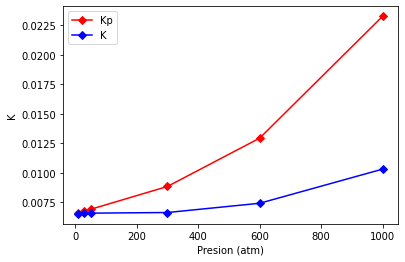

In [12]:
import numpy as np # importo numpy con el alias np
import matplotlib.pyplot as plt # importo pyplot de matplotlib con el alias plt
from scipy.optimize import curve_fit #para hacer ajustes
p=np.array([10,30,50,300,600,1000]) #atm
kp=np.array([6.59,6.76,6.9,8.84,12.94,23.28])
kp = kp*1e-3
kphi=np.array([0.988,0.969,0.953,0.75,0.573,0.443])

plt.plot(p, kp,'-rD',label = 'Kp')
plt.plot(p, kp*kphi,'-bD',label = 'K')
plt.xlabel('Presion (atm)') # Rótulo de eje horizontal
plt.ylabel('K') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

Defino un polinomio de grado 4 para extrapolar el comportamiento a p =0

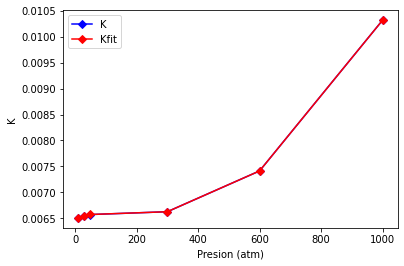

[-1.34264112e-14  2.85467261e-11 -1.36549083e-08  2.35817818e-06
  6.48945492e-03]
el valor de k0 es...


In [22]:
def pol4(x,a,b,c,d,e):  #defino una función para ajustar un polinomio de grado 4
  yfit = []
  for i in x:
    y=a*(i**4)+b*(i**3)+c*(i**2)+d*i+e
    yfit.append(y)
  return np.array(yfit)

parampol4,paramcovarpol4 = curve_fit(pol4,p, kp*kphi)

#veamos como se ve el fiteo...
plt.plot(p, kp*kphi,'-bD',label = 'K')
plt.plot(p, pol4(p,*parampol4),'-r',label = 'Kfit')
plt.xlabel('Presion (atm)') # Rótulo de eje horizontal
plt.ylabel('K') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

print(parampol4)

print("el valor de k0 es...")

**Extra:** estimar kphi a partir de k0?


0.006489454924291505
[0.98474278 0.95997854 0.94050071 0.73410124 0.50150347 0.27875665]


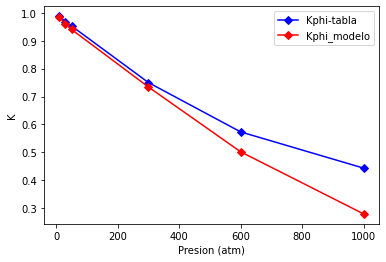

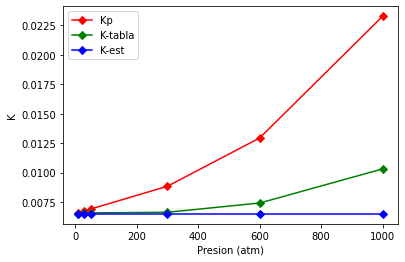

In [26]:
print(parampol4[4])
kphi_es=parampol4[4]/kp
print(kphi_es)

#veamos como se ve el fiteo...
plt.plot(p, kphi,'-bD',label = 'Kphi-tabla')
plt.plot(p, kphi_es,'-rD',label = 'Kphi_estimado')
plt.xlabel('Presion (atm)') # Rótulo de eje horizontal
plt.ylabel('K') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla

##Y entonces...

plt.plot(p, kp,'-rD',label = 'Kp')
plt.plot(p, kp*kphi,'-gD',label = 'K-tabla')
plt.plot(p, kp*kphi_es,'-bD',label = 'K-est')
plt.xlabel('Presion (atm)') # Rótulo de eje horizontal
plt.ylabel('K') #Rótulo de eje vertical
plt.legend() #Para mostrar la leyenda de cada línea graficada
plt.show() #Para mostrar graficar la figura en pantalla